# Einführung Statistik Labor: Beispielaufgabe 1

Im Folgenden wird eine Beispielaufgabe behandelt, deren Bearbeitung Ihnen für die eigentlichen Laboraufgaben helfen kann.

In diesem Beispiel sollen die Noten und Punktzahlen einer Klausur ausgewertet werden. <br>Die dazu erforderlichen Daten liegen noch in der Datei _einf_b1.txt_ in drei Feldern (laufende Nummer, Punktzahl, Note), die durch Leerzeichen getrennt sind. Die Daten sollen in das Jupyter Notebook _einf_aufg1.ipynb_ geladen und dort weiterbearbeitet werden.

## Daten einlesen und Häufigkeitstabelle erstellen

### a) Lesen Sie die Daten aus der Datei _einf_b1.txt_ ein.
Verwenden Sie dazu die Bibliothek Pandas.

In [36]:
# pandas Bibliothek importieren
import pandas as pd
# csv- bzw. txt-File lesen
# Pfad unter Windows z. B. C:\\Users\km\Downloads\einf_b1.txt mit / eingeben
df = pd.read_csv('einf_b1.txt',  # Datei oder Pfad 
                     sep = ' ', # Trenner Leerzeichen
                     encoding = 'latin1',
                     na_values = '.', # weist dem Wert in Anführungszeichen (hier: Punkt) NaN zu
                     header = None, # Liste hat keine Überschriften
                     decimal = ',', # macht aus Dezimalkomma Dezimalpunkt
                     names = ['Nr.','Punkte', 'Note']) # Spaltenüberschriften
# Die Daten werden in ein pandas.DataFrame mit Namen df gespeichert. 
# Gibt das DataFrame df aus:
df

,Nr.,Punkte,Note
0,1,110,1.0
1,2,90,1.7
2,3,108,1.0
3,4,95,1.3
4,5,80,2.3
5,6,74,2.7
6,7,52,3.7
7,8,78,2.3
8,9,39,4.7
9,10,102,1.0


### b) Erstellen Sie eine Häufigkeitstabelle

Berechnen Sie die Häufigkeiten der Noten „sehr gut“ (1,0 und 1,3), „gut“ (1,7 bis
2,3), „befriedigend“ (2,7 bis 3,3), „ausreichend“ (3,7 und 4,0) und „mangelhaft“ (4,7
und 5,0).

Zunächst werden die Notenintervalle festgelegt, `noten_bins` gibt die Grenzen der Notenunterteilung an. <br>
Die Intervalle entsprechen den sprechenden Notenwerten („sehr gut“, „gut“, etc.). <br> 
Mit der Funktion cut() werden die sprechenden Noten den einzelnen Notenintervallen zugeteilt.

In [37]:
bins = [0,1.3,2.3,3.3,4.0,5.0]
df2 = pd.cut(df['Note'],bins)

Als Beschriftung sollen in allerdings dem Fall die Notenwerte erscheinen, nicht die Intervalle. 

In [38]:
# Grenzen der Intervalle zum Auszählen festlegen als list/array
noten_bins = [0,1.3,2.3,3.3,4.0,5.0]
# Definition der sprechenden Notenwerte als list/array
noten=['sehr gut','gut','befriedigend','ausreichend','mangelhaft']
# pandas.cut teilt Daten in  der Spalte 'Note' den Intervallen zu. 
grades = pd.cut(df['Note'], # Input Array, Spalte Noten des dataframe df
                        noten_bins, # Intervallgrenzen
                        right = True, #default/True: Intervalle rechtsseitig abgeschlossen
                        labels = noten) # gibt die sprechenden Notenwerte anstelle der Intervalle aus
# Ergänzt die Tabelle df um die Spalte 'Notenwerte' und weist die Werte aus der series 'grades' zu.  
df['Notenwerte']= grades
# Gibt die ersten 10 Datensätze aus
df.head(10)

,Nr.,Punkte,Note,Notenwerte
0,1,110,1.0,sehr gut
1,2,90,1.7,gut
2,3,108,1.0,sehr gut
3,4,95,1.3,sehr gut
4,5,80,2.3,gut
5,6,74,2.7,befriedigend
6,7,52,3.7,ausreichend
7,8,78,2.3,gut
8,9,39,4.7,mangelhaft
9,10,102,1.0,sehr gut


In [39]:
# Die Funktion value_counts() kann dann die einzelnen Notenwerte abzählen.
# zählt die Häufigkeit der Spalte 'Notenwerte' im DataFrame df
#pd.value_counts(df['Notenwerte'],sort=False)
pd.Series(df["Notenwerte"]).value_counts()

Notenwerte
gut             20
sehr gut        10
befriedigend     9
ausreichend      2
mangelhaft       1
Name: count, dtype: int64

In [40]:
# Das Ergebnis ist eine Pandas Series:
type(pd.Series(df["Notenwerte"]).value_counts())

pandas.core.series.Series

In [41]:
# Aus den ausgezählten Werten erstellen wir durch den Befehl .reset_index() ein DataFrame, 
# dem wir den Namen Hf (Häufigkeiten) geben. 
# Durch reset_index wird der Index der Series zu einer Spalte 
# und ein neuer fortlaufender Index wird eingeführt
Hf = pd.Series(df["Notenwerte"]).value_counts().reset_index()
# Mit .columns weisen wir allen  Spalten mit einer Liste neue Namen zu
Hf.columns = ['Schulnoten', 'Häufigkeit']
Hf

,Schulnoten,Häufigkeit
0,gut,20
1,sehr gut,10
2,befriedigend,9
3,ausreichend,2
4,mangelhaft,1


### Alternative zur Häufigkeitsberechnung: mit groupby
Die Idee hinter der Funktion `groupby()` ist, dass sie ein DataFrame nimmt, es auf der Grundlage einiger Schlüsselwerte in Teile aufteilt, Berechnungen auf diese Teile anwendet und die Ergebnisse dann wieder in einem anderen DataFrame zusammenfasst. In Pandas wird dieses Muster als split-apply-combine bezeichnet. <br>
`.count()`zählt dabei einfach, wie viele Werte es in einer Klasse gibt.

In [42]:
df.groupby(by=['Notenwerte'], observed=False).count()

,Nr.,Punkte,Note
Notenwerte,,,
sehr gut,10,10,10
gut,20,20,20
befriedigend,9,9,9
ausreichend,2,2,2
mangelhaft,1,1,1


Möchte man einfach nur die Notenwerte mit den Häufigkeiten, kann man vorher einfach zwei Spalten auswählen und `.groupby()` auf diesen kleineren DataFrame anwenden. <br>
Die Spalte kann zudem mit `.rename()` noch umbenannt werden. 

In [43]:
df2 = df[['Notenwerte', 'Nr.']]
df2 = df2.groupby(by=['Notenwerte'], observed=False).count()
df2 = df2.rename(columns={"Nr.": "Anzahl"})
df2

,Anzahl
Notenwerte,
sehr gut,10
gut,20
befriedigend,9
ausreichend,2
mangelhaft,1


## Einschub: Boolean Masking
Ein Weg, um Daten aus einem Datenframe zu bekommen, ist Boolean Masking. Boolean Masking ist das Herzstück schneller und effizienter Abfragen in Numpy und Pandas und entspricht dem Bitmasking, das in anderen Bereichen der IT verwendet wird. Wir schauen uns an, wie Boolesche Masking funktioniert und wie man es auf einen DataFrame anwendet, um die Daten herauszufiltern, an denen man interessiert ist.

Eine **boolesche Maske** ist ein eindimensionales Array wie eine Series oder ein zweidimensionales Array wie ein DataFrame, bei dem jeder der Werte im Array entweder wahr oder falsch ist. Dieses Array wird im Wesentlichen über die Datenstruktur gelegt, die wir abfragen wollen. Jede Zelle, die auf einen wahren Wert ausgerichtet ist, wird in unser Endergebnis aufgenommen, jede Zelle, die auf einen falschen Wert ausgerichtet ist, nicht.

Boolesche Masken werden erstellt, indem _Operatoren direkt auf die Pandas-Objekte Series oder DataFrame angewendet_ werden. In unserem Datensatz mit den Klausurergebnissen könnten wir beispielsweise daran interessiert sein, nur diejenigen Klausuren zu sehen, die eine Note besser als 2,3 haben.

Um eine boolesche Maske für diese Abfrage zu erstellen, projizieren wir die Spalte "Note" mithilfe des Indexing Operators und wenden den Operator "kleiner als" mit einem Vergleichswert von 2.5 an. Dies ist im Wesentlichen die Übertragung eines Vergleichsoperators, kleiner als, wobei die Ergebnisse als boolesche Series zurückgegeben werden. Die resultierende Serie ist indiziert, wobei der Wert jeder Zelle entweder Wahr oder Falsch ist ist, je nachdem, ob die Note besser als 2.5 ist oder nicht.

In [44]:
mask = df['Note'] <= 2.3
mask

0      True
1      True
2      True
3      True
4      True
5     False
6     False
7      True
8     False
9      True
10     True
11     True
12    False
13     True
14    False
15     True
16     True
17     True
18    False
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27    False
28     True
29    False
30     True
31     True
32    False
33     True
34    False
35    False
36     True
37     True
38     True
39     True
40     True
41    False
Name: Note, dtype: bool

Das ist ziemlich fundamental, also nehmen Sie sich einen Moment Zeit, um sich das anzusehen. Das Ergebnis der Anwendung eines Vergleichsoperators ist eine boolesche Maske - wahre oder falsche Werte je nach den Ergebnissen des Vergleichs. Darunter wendet Pandas den angegebenen Vergleichsoperator durch Vektorisierung (also effizient und parallel) auf alle Werte in dem von Ihnen angegebenen Array an, das in diesem Fall die Projizierung auf eine Spalte des DataFrame ist. Das Ergebnis ist eine Series, da nur eine Spalte mit dem Operator bearbeitet wird, gefüllt mit entweder Wahr oder Falsch, was der Vergleichsoperator zurückgibt.

Was machen wir nun mit der Boolschen Make? Wir können Sie auf das DataFrame anwenden, um nur die Dataensätze zu bekommen, bei denen die Maske True ist. Dafür kann man den Indexing Operator verwenden. <br>
Bemerkung: Und-Verknüpfung von Abfragen mit Klammern und `&`, z. B. 
df[(df['Note']>2.5) & (df['Note'] < 4)]

In [45]:
#df[mask] oder
df[df['Note']< 2.5]

,Nr.,Punkte,Note,Notenwerte
0,1,110,1.0,sehr gut
1,2,90,1.7,gut
2,3,108,1.0,sehr gut
3,4,95,1.3,sehr gut
4,5,80,2.3,gut
7,8,78,2.3,gut
9,10,102,1.0,sehr gut
10,11,79,2.3,gut
11,12,88,1.7,gut
13,14,86,2.0,gut


Das funktioniert auch mit Strings. (Damit kann man z. B. nach Männer und Frauen filtern...)

In [46]:
mask = df['Notenwerte']=='gut'
# df[mask] oder
df[df['Notenwerte']=='gut'].head(10)

,Nr.,Punkte,Note,Notenwerte
1,2,90,1.7,gut
4,5,80,2.3,gut
7,8,78,2.3,gut
10,11,79,2.3,gut
11,12,88,1.7,gut
13,14,86,2.0,gut
15,16,87,2.0,gut
17,18,94,1.7,gut
20,21,85,2.0,gut
21,22,82,2.0,gut


## Summe zur Kontrolle und relative Häufigkeiten berechnen

### c) Berechnen Sie die Summe der Häufigkeiten

Dies kann einfach mit .sum() erfolgen.  <br>
Kontrollieren Sie, ob Sie alle Werte erfasst haben. 

In [47]:
# Die Gesamtzahl n der Noten kann als Summe der Spalte 'Häufigkeit' mit .sum() berechnet werden.
n = Hf['Häufigkeit'].sum()
print('n =',n)
print('Anzahl der Daten:', len(df))

n = 42
Anzahl der Daten: 42


### d) Berechnen Sie, welche prozentualen Anteile auf die Notenstufen „sehr gut“ bis „mangelhaft“ entfallen. 
Geben Sie die Prozentzahlen als ganze Zahlen (ohne Nachkommastellen) an.

In [48]:
# Ergänzen der Tabelle Häufigkeit um die relativen Häufigkeiten
# Fügt neue Spalte 'rel. Häufigkeit in %' dazu
Hf['rel. Häufigkeit in %'] = Hf['Häufigkeit']/n*100
# map ersetzt die Einträge der jeweiligen Spalte durch formatierte Einträge
#Hf['Häufigkeit']=Hf['Häufigkeit'].map('{:,.0f}'.format)
Hf['rel. Häufigkeit in %']=Hf['rel. Häufigkeit in %'].map('{:,.0f}'.format)
Hf

,Schulnoten,Häufigkeit,rel. Häufigkeit in %
0,gut,20,48
1,sehr gut,10,24
2,befriedigend,9,21
3,ausreichend,2,5
4,mangelhaft,1,2


## Säulendiagramm erstellen

### e) Stellen Sie die Häufigkeiten aus b) mit einem Säulendiagramm dar. 
Geben Sie dem Diagramm einen passenden Titel, beschriften Sie die Achsen.

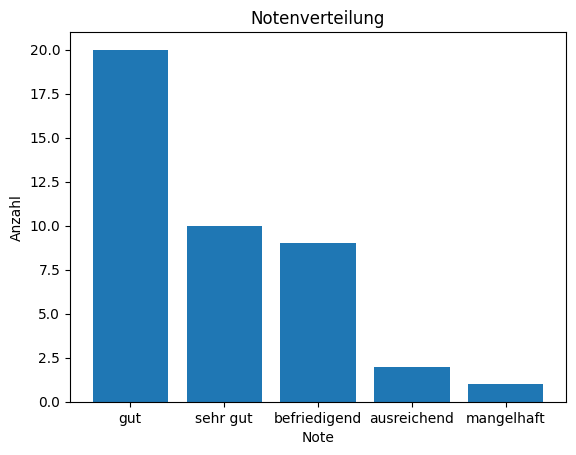

In [49]:
# Importiere aus der Bibliothek matplotlib die Unterbibliothek pyplot mit der Abkürzung plt
import matplotlib.pyplot as plt
# Säulendiagramm ('bar chart') erstellen mit 
# plt.bar(x-Werte (Label), y-Werte (Häufigkeiten))
plt.bar(Hf['Schulnoten'], Hf['Häufigkeit'])
# Achsenbeschriftungen und Titel
plt.xlabel('Note')             # Beschriftung der x-Achse
plt.ylabel('Anzahl')           # Beschriftung der y-Achse
plt.title('Notenverteilung')   # Diagrammtitel
plt.show()

### f) Führen Sie in dem Diagramm die folgenden Umformatierungen durch
f1) Die Farbe der Säulen soll dunkelblau sein. <br>
f2) Jede Säule soll mit der zugehörigen Häufigkeit (wie oft gab es diese Note?) beschriftet sein.

Für die Farbe gibt es die option `color`. <br>
Für die Beschriftung mit den Häufigkeiten kann man z.B. die Methode `bar_label(...)` verwenden. Argument ist der so genannte BarContainer, der Information über die Säulen enthält und vom Plot-Befehl zurückgegeben wird. 

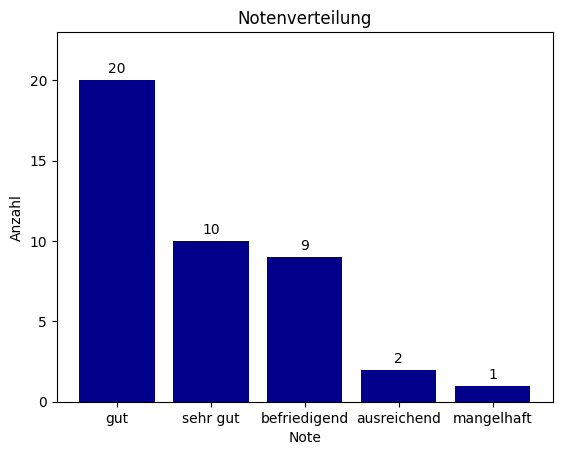

In [50]:
# Farbe darkblue:
rects = plt.bar(Hf['Schulnoten'], Hf['Häufigkeit'], color='darkblue')
# rects: BarContainer, der Information über die Säulen enthält. 

# Achsenbeschriftungen und Titel:
plt.xlabel('Note')
plt.ylabel('Anzahl')
plt.title('Notenverteilung')
# Säulenbeschriftung mit Häufigkeiten: 
plt.bar_label(rects, padding=3) # bar_label ab matplotlib Version 3.4 verfügbar
# rects: BarContainer, der Information über die Säulen enthält (Rückgabe von plt.bar)
# padding: Abstand der Beschriftung von den Säulen in Punkt
plt.ylim(0, 23)
# Größe der y-Achse wegen der Beschriftung anpassen
plt.show()

### g) gruppiertes Säulendiagramm
Es sollen die Häufigkeiten für zwei verschiedene Klausuren in einem Diagramm dargestellt werden. 

In [51]:
# Häufigkeiten der 2. Klausur:
Hf['Häufigkeit2'] = [2, 8, 19, 13, 5]

Für ein gruppiertes Säulendiagramm erstellt man zwei Säulendiagramme in einer Grafik, deren Säulen etwas nach link bzw. nach rechts verschoben sind. 
Dazu verwenden wir `subplots()`, da hier ein Objekt zur Beschreibung der Graphik (`fig`) sowie der Axen (`ax`) zurückgegeben wird. `ax` verwenden wir für die Formatierung/Beschriftung der Axen. 

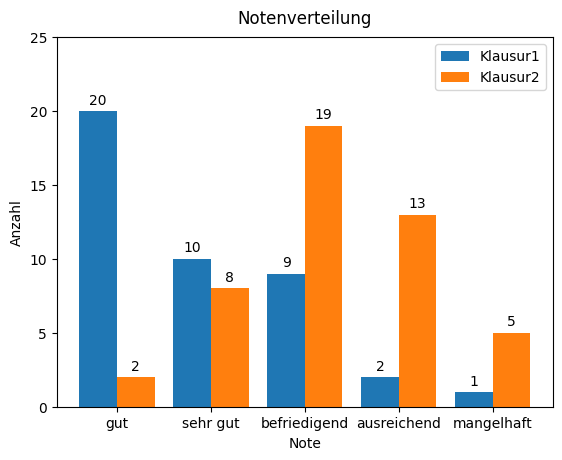

In [52]:
import numpy as np
fig, ax = plt.subplots() 
# Erzeugt eine figure und eine Reihe von subplots. 
# Ohne Argument wird nur ein subplot erzeugt 
# (entspricht subplots(1,1) - 1 Zeile, 1 Spalte)
# Rückgabe ist ein figure-Objekt sowie ein Axes-Objekt

x = np.arange(len(Hf)) 
# Die x-Koordinaten der Säulen. 

bar_width = 0.4
# Breite der Säulen. Standardbreite bei bar-Plots: 0.8

# Säulendiagramme: pyplot.bar(x, height, width, weitere Argumente wie z. B. label)
rects1 = plt.bar(x - bar_width/2, Hf['Häufigkeit'], width = bar_width, label='Klausur1')
rects2 = plt.bar(x + bar_width/2, Hf['Häufigkeit2'], width = bar_width, label='Klausur2')
# Zwei bar-Plots, bei denen einmal die Position der Säulen um eine halbe Säulenbreite 
# nach links (- bar_width/2),  das andere mal nach rechts (+ bar_width/2) 
# verschoben wird
# Rückgabe: BarContainer -- Container with all the bars and optionally errorbars.

# Beschriftung der Säulen
plt.bar_label(rects1, padding=3) # bar_label geht erst ab matplotlib 3.4
plt.bar_label(rects2, padding=3)
# Label a bar plot.
# Adds labels to bars in the given BarContainer. 
# padding: Distance of label from the end of the bar, in points.

# You may need to adjust the axis limits to fit the labels:
plt.ylim(0, 25)

# Sonstige Beschriftung
plt.legend()
ax.set_xticks(x)
ax.set_xticklabels(Hf['Schulnoten'])
ax.set_xlabel('Note')
ax.set_ylabel('Anzahl')
ax.set_title('Notenverteilung', pad=10)
plt.show()

In [53]:
ax

<Axes: title={'center': 'Notenverteilung'}, xlabel='Note', ylabel='Anzahl'>

Hinweis: matplotlib ist eine mächtige Bibliothek in Python mit der alle möglichen Graphen erstellt werden können. <br> 
Hier finden Sie die Dokumentation von matplotlib <br>
https://matplotlib.org/stable/index.html <br>
Z. B. auch ein Beispiel für ein "Grouped bar chart with labels" <br>
https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py <br>
oder "pie charts" <br>
https://matplotlib.org/stable/gallery/pie_and_polar_charts/index.html

## Kennzahlen berechnen

### h) Berechnen Sie Mittelwert, empirische Varianz und empirische Standardabweichung 
der Punktzahlen und geben Sie sie mit 4 Nachkommastellen an.
### Berechnen Sie Median und Spannweite 
der Punktzahlen, ohne die Punktzahlenliste zu sortieren (Spannweite=größter Datenwert minus kleinster Datenwert)<br>
und geben Sie die Ergebnisse in einer Tabelle aus. 

***Einschub: Hinweis zur Ausgabe der Ergebnisse*** <br>
Dictionaries assoziieren Keys mit Werten. Dies kann man nutzen, um Ergebnisse übersichtlich in einem Dataframe auszugeben. Beispiel: 

In [54]:
dictionary = {'A': [1, 1, 2, 3, 4],
              'B': [3, 6, 3, 8, 9],
              'C': ['a', 'b', 'c', 'd', 'e']}
print(dictionary)
df2 = pd.DataFrame({'A': [1, 1, 2, 3, 4],
                   'B': [3, 6, 3, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})
df2

{'A': [1, 1, 2, 3, 4], 'B': [3, 6, 3, 8, 9], 'C': ['a', 'b', 'c', 'd', 'e']}


,A,B,C
0,1,3,a
1,1,6,b
2,2,3,c
3,3,8,d
4,4,9,e


In [55]:
# Die Spalten kann man über ein sog. Dictonary definieren
key_figures = {'Kennzahlen':[df['Punkte'].mean(), 
                             df['Punkte'].var(), 
                             df['Punkte'].std(), 
                             df['Punkte'].median(), 
                             df['Punkte'].max() - df['Punkte'].min()]}
# mit pd.DataFrame in ein DataFrame umwandeln und die Indizes/Beschriftungen angeben. 
key_frame = pd.DataFrame(key_figures, index = ['arithm. Mittel', 'emp. Varianz', 'emp. Stdabw.', 'emp. Median', 'Spannweite']).round(4)
key_frame

,Kennzahlen
arithm. Mittel,82.2381
emp. Varianz,250.2834
emp. Stdabw.,15.8203
emp. Median,83.5000
Spannweite,71.0000


### i) Speichern 
Sie die geänderte Datei *einf_aufg1.ipynb* in Ihr persönliches Verzeichnis ab.

`File > Save and Checkpoint`. <br>
`File > Close and Halt`.